<a href="https://colab.research.google.com/github/icenicee/Digital-Caravanserai-web/blob/master/pw3_radiometry_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Work 3: Histogram manipulation, Color spaces

<br/><br/>

In this third practical session,  we will first handle greyscale histograms to do histogram equalization, histogram transfer and other simple operations. We will manipulate color images and display a color distribution. Finally, we will try some simple classification algorithms.

<br/><br/>

In [1]:
#Dowmloading images
!wget https://perso.telecom-paristech.fr/aleclaire/athens/imagesTP3.zip
!unzip -qq imagesTP3.zip

--2025-11-17 14:41:10--  https://perso.telecom-paristech.fr/aleclaire/athens/imagesTP3.zip
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1488912 (1.4M) [application/zip]
Saving to: ‘imagesTP3.zip’

imagesTP3.zip       100%[===================>]   1.42M  3.15MB/s    in 0.5s    

2025-11-17 14:41:12 (3.15 MB/s) - ‘imagesTP3.zip’ saved [1488912/1488912]



In [2]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

## Histogram equalization
In order to increase the dynamic of an image, and to increase its contrast, a simple tool is histogram equalization. The idea of histogram equalization is to modify the pixel values so that the resulting image has a linear cumulative distribution function, which amounts to the cumulation of the histogram.

First, let's load the image "lena.tif", visualize it in greyscale and plot its histogram.

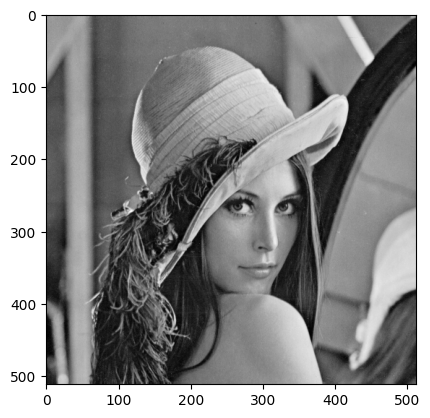

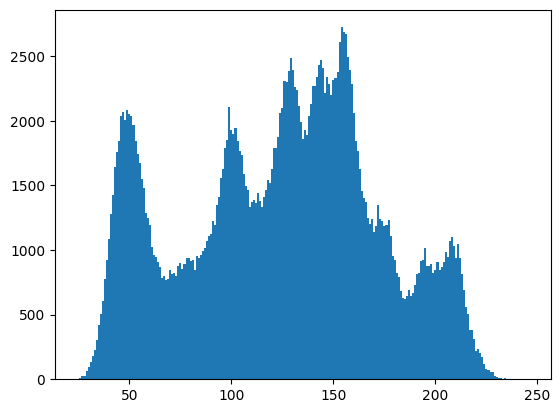

In [7]:
img = skio.imread("imagesTP3/lena.tif") # //2+256//4
histogram = skimage.exposure.histogram(img, 256)

plt.imshow(img, cmap = "gray")
plt.show()
plt.bar(histogram[1],histogram[0], width = 1)
plt.show()

Here is the algorithm for histogram equalization :
- flatten the image
- compute the cumulative distribution function (CDF) of your image and the bins using the skimage.exposure.cumulative_distribution() function
- interpolate the values of the new pixels using the previous CDF, using np.interp()
- reshape the flat vector into an image

- **Q** :  Fill in the following code. Visualize the two images. What is the effect created on the image ? Visualize the cumulative distribution functions of the original and equalized image, to check if your equalization worked.
- **A** : ...
- **Q** : Visualize the histogram of the resulting image. What do you observe ?
- **A** :

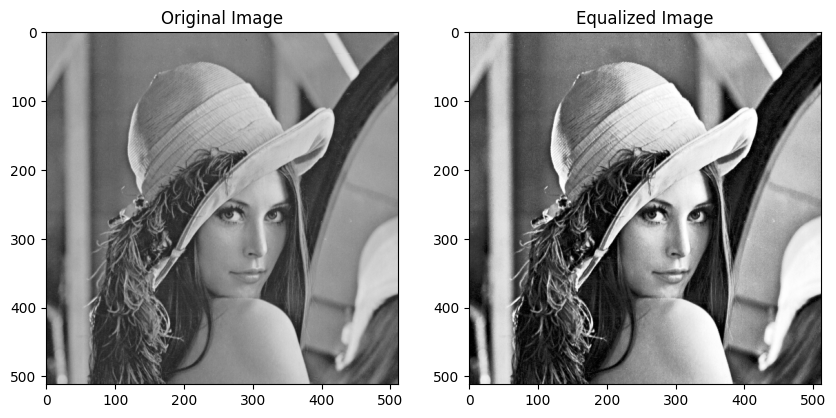

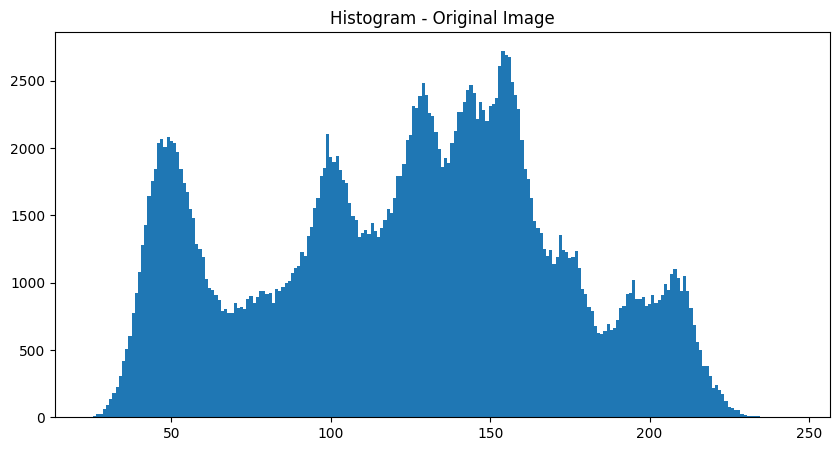

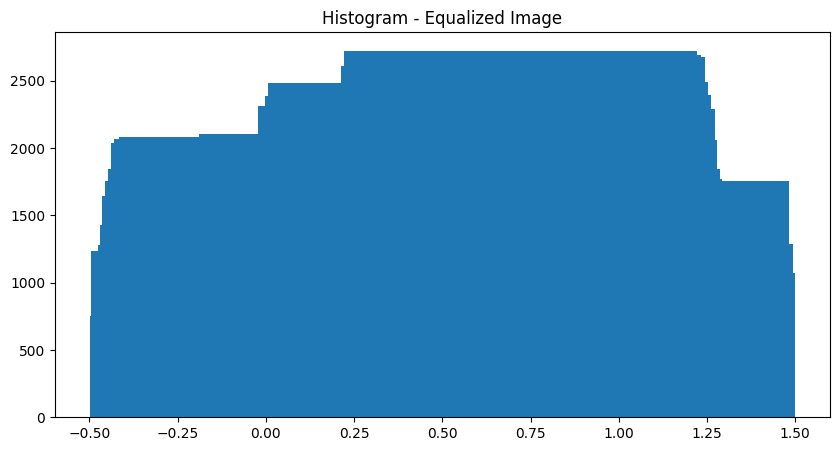

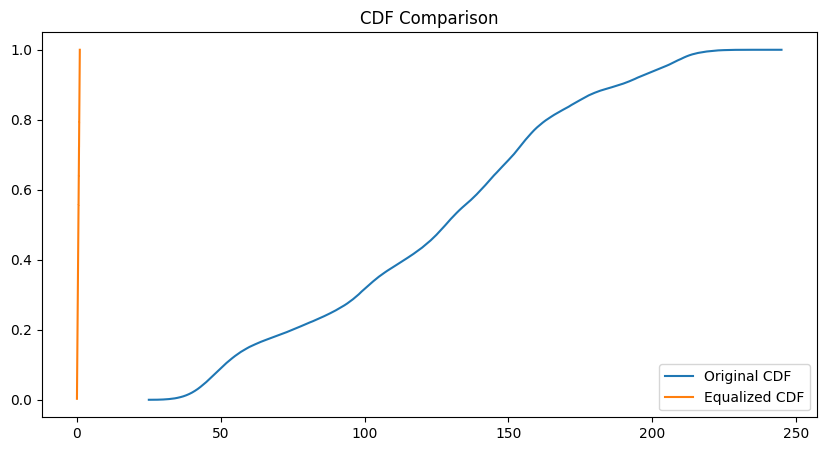

In [6]:

# Histogram equalization
new_image = skimage.exposure.equalize_hist(img)

# Visualize original and equalized
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(new_image, cmap="gray")
ax[1].set_title("Equalized Image")
plt.show()

# Histogram of original image
hist_orig, bins_orig = skimage.exposure.histogram(img, nbins=256)
cdf_orig = hist_orig.cumsum()
cdf_orig = cdf_orig / cdf_orig[-1]

# Histogram of equalized image
hist_eq, bins_eq = skimage.exposure.histogram(new_image, nbins=256)
cdf_eq = hist_eq.cumsum()
cdf_eq = cdf_eq / cdf_eq[-1]

# Plot histograms
plt.figure(figsize=(10,5))
plt.bar(bins_orig, hist_orig, width=1)
plt.title("Histogram - Original Image")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(bins_eq, hist_eq, width=1)
plt.title("Histogram - Equalized Image")
plt.show()

# Plot CDFs
plt.figure(figsize=(10,5))
plt.plot(bins_orig, cdf_orig, label="Original CDF")
plt.plot(bins_eq, cdf_eq, label="Equalized CDF")
plt.title("CDF Comparison")
plt.legend()
plt.show()

## Histogram Transfer

Another interesting manipulation that we can is to transfer the histogram of a target image to the histogram of our source image. It can be done in color or greylevel. One funny application is to transfer color palettes between image paintings. Here, we will do a simple example on greyscale images.

Here is the pseudo-code for that method :
- flatten both images
- get the indices of the sorted source image
- change the values of the indexed pixels of the source image with the sorted pixels of the target image
- reshape the resulting vector into an image

Code the previous algorithm. Visualize the histogram of the resulting image and the histogram of the target image, to check if your algorithm works.

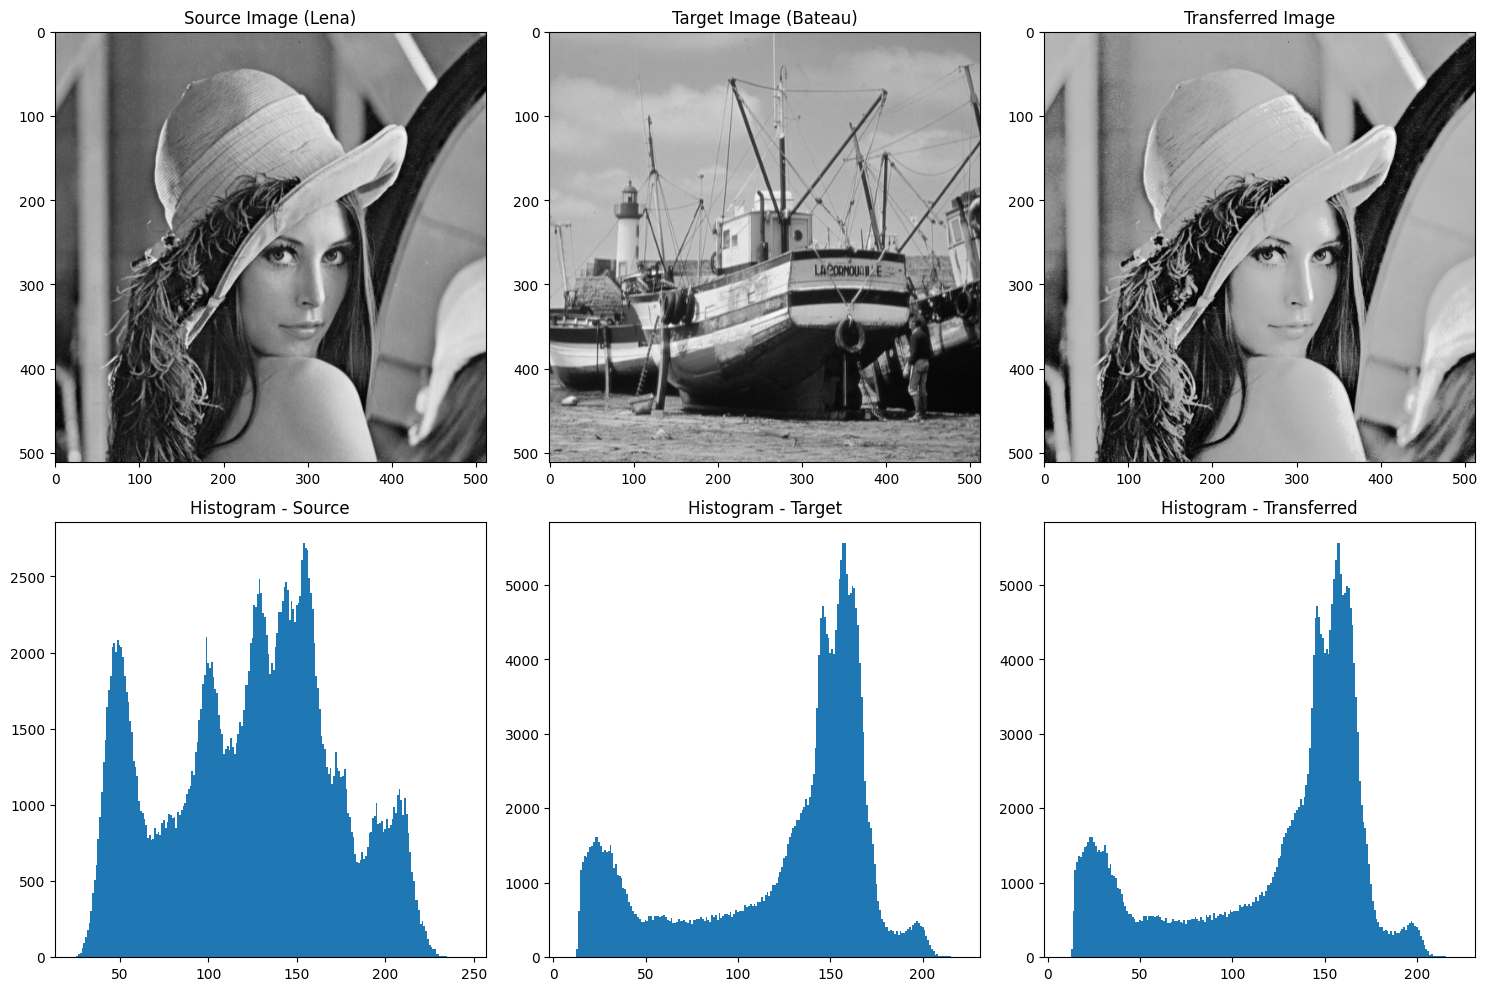

In [9]:
image_s = skio.imread("imagesTP3/lena.tif")
image_t = skio.imread("imagesTP3/bateau.tif")

# Flatten both images
image_s_flat = image_s.flatten()
image_t_flat = image_t.flatten()

# Get the indices of the sorted source image
s_sorted_indices = np.argsort(image_s_flat)

# Sort the target image pixels
t_sorted_values = np.sort(image_t_flat)

# Create a new flattened image array with the same dtype as the source image
new_image_flat = np.zeros_like(image_s_flat, dtype=image_s.dtype)

# Assign the sorted target values to the corresponding sorted source positions
# The pixel that was the k-th smallest in the source now takes the value of the k-th smallest in the target.
new_image_flat[s_sorted_indices] = t_sorted_values

# Reshape the flattened array back to the original source image shape
new_image = new_image_flat.reshape(image_s.shape)

# Visualization
fig,axs = plt.subplots(2,3,figsize = (15,10))
axs[0,0].imshow(image_s,cmap = "gray")
axs[0,0].set_title("Source Image (Lena)")
axs[0,1].imshow(image_t,cmap = "gray")
axs[0,1].set_title("Target Image (Bateau)")
axs[0,2].imshow(new_image,cmap = "gray")
axs[0,2].set_title("Transferred Image")

# compute histograms
histogram_s = skimage.exposure.histogram(image_s, 256)
histogram_t = skimage.exposure.histogram(image_t, 256)
histogram_new = skimage.exposure.histogram(new_image, 256)

axs[1,0].bar(histogram_s[1],histogram_s[0], width = 1)
axs[1,0].set_title("Histogram - Source")
axs[1,1].bar(histogram_t[1],histogram_t[0], width = 1)
axs[1,1].set_title("Histogram - Target")
axs[1,2].bar(histogram_new[1],histogram_new[0], width = 1)
axs[1,2].set_title("Histogram - Transferred")
plt.tight_layout()
plt.show()

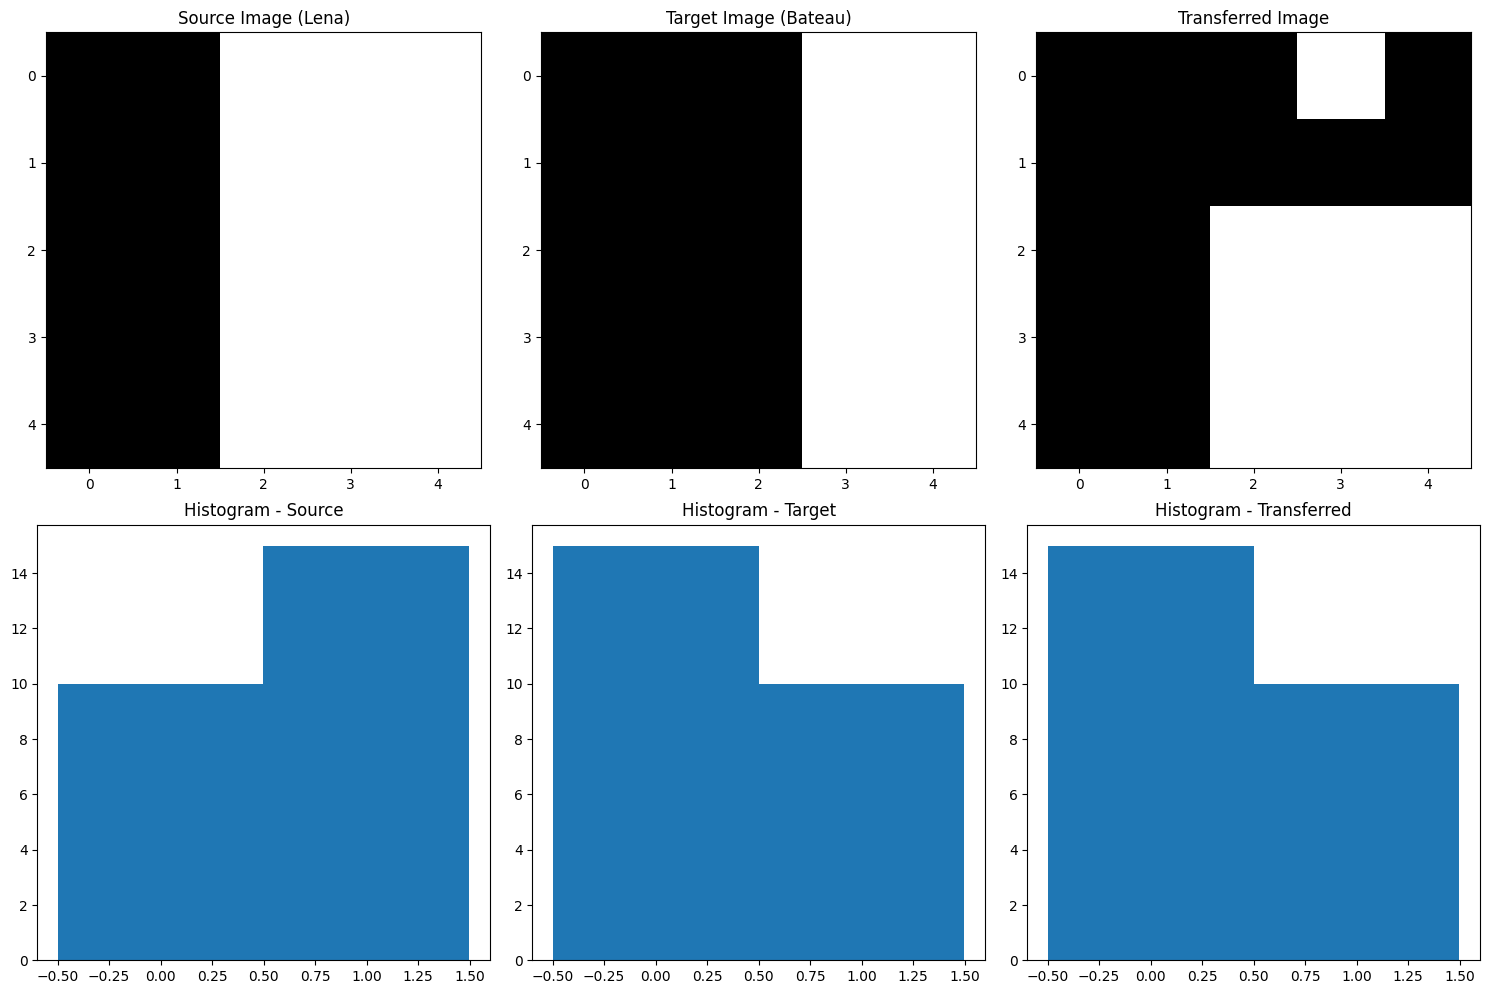

In [10]:
# second example of histogram transfer with simple binary images

image_s = np.ones([5,5])
image_s[:,:2]=0
image_t = np.ones([5,5])
image_t[:,:3]=0

# Flatten both images
image_s_flat = image_s.flatten()
image_t_flat = image_t.flatten()

# Get the indices of the sorted source image
s_sorted_indices = np.argsort(image_s_flat)

# Sort the target image pixels
t_sorted_values = np.sort(image_t_flat)

# Create a new flattened image array with the same dtype as the source image
new_image_flat = np.zeros_like(image_s_flat, dtype=image_s.dtype)

# Assign the sorted target values to the corresponding sorted source positions
# The pixel that was the k-th smallest in the source now takes the value of the k-th smallest in the target.
new_image_flat[s_sorted_indices] = t_sorted_values

# Reshape the flattened array back to the original source image shape
new_image = new_image_flat.reshape(image_s.shape)

# Visualization
fig,axs = plt.subplots(2,3,figsize = (15,10))
axs[0,0].imshow(image_s,cmap = "gray")
axs[0,0].set_title("Source Image (Lena)")
axs[0,1].imshow(image_t,cmap = "gray")
axs[0,1].set_title("Target Image (Bateau)")
axs[0,2].imshow(new_image,cmap = "gray")
axs[0,2].set_title("Transferred Image")

# compute histograms
histogram_s = skimage.exposure.histogram(image_s, 256)
histogram_t = skimage.exposure.histogram(image_t, 256)
histogram_new = skimage.exposure.histogram(new_image, 256)

axs[1,0].bar(histogram_s[1],histogram_s[0], width = 1)
axs[1,0].set_title("Histogram - Source")
axs[1,1].bar(histogram_t[1],histogram_t[0], width = 1)
axs[1,1].set_title("Histogram - Target")
axs[1,2].bar(histogram_new[1],histogram_new[0], width = 1)
axs[1,2].set_title("Histogram - Transferred")
plt.tight_layout()
plt.show()

## Color spaces

In this section we will work with `fruits.tif` or `fleur.tif`.

In [14]:
# The following function allows to display the color distribution of an image as a point cloud.
def colordistrib(imrgb,nb=3000,dpi=100):
    X = imrgb.reshape((nrow*ncol,3))
    idx = np.random.randint(X.shape[0], size=(nb,))
    Xs = X[idx, :]/255.
    fig = plt.figure(dpi=dpi)
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(Xs[:, 0], Xs[:,1],Xs[:, 2],c=Xs, s=40)
    plt.show()

### RGB space

In the following cell, you should load the image and display it in RGB, and with color channels separately.

You should also use the provided function `colordistrib` to display the color distribution.

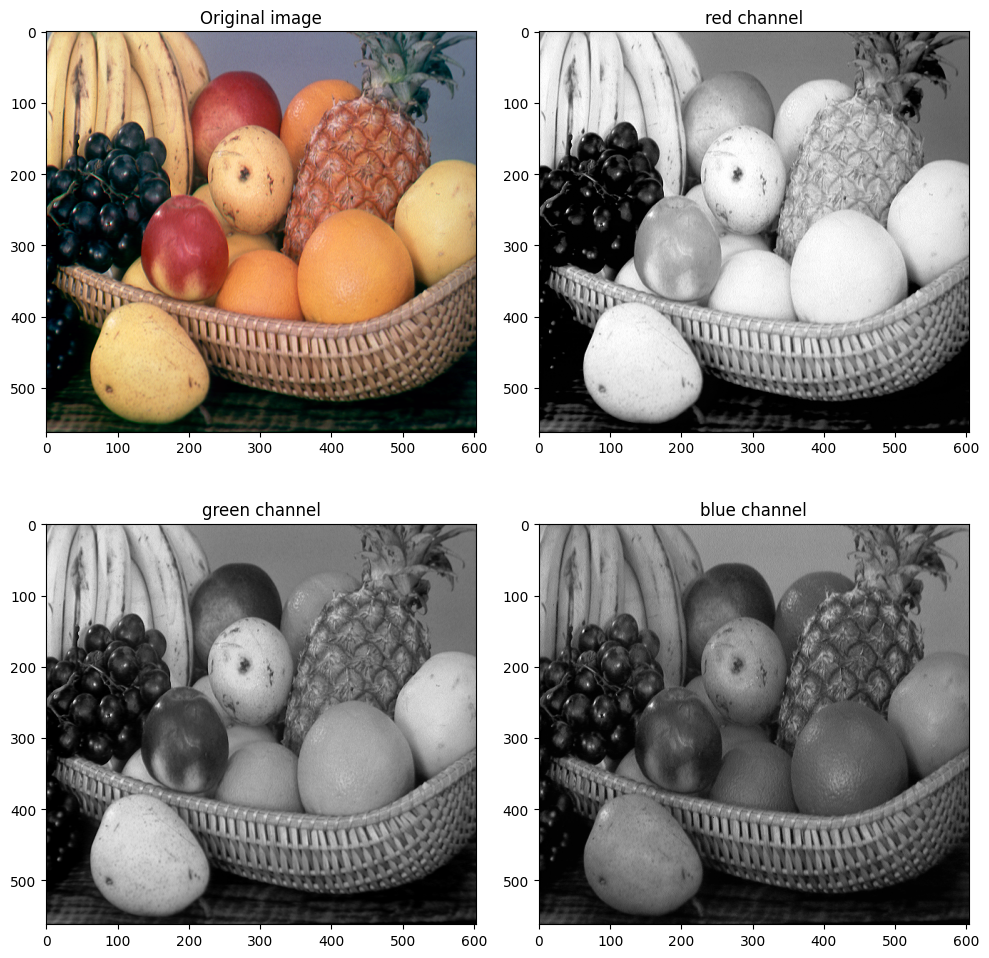

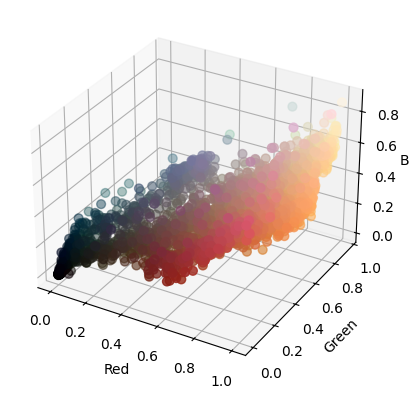

In [15]:
imrgb =skio.imread("imagesTP3/fruits.tif")

# extract the three channels imred, imgreen, imblue from imrgb and normalize between 0 and 1
imred = imrgb[:, :, 0] / 255.0
imgreen = imrgb[:, :, 1] / 255.0
imblue = imrgb[:, :, 2] / 255.0

#image size
[nrow,ncol,nch]=imrgb.shape
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#we display the images
axes[0, 0].imshow(imrgb)
axes[0,0].set_title('Original image')
axes[0, 1].imshow(imred, cmap="gray")
axes[0,1].set_title('red channel')
axes[1, 0].imshow(imgreen, cmap="gray")
axes[1,0].set_title('green channel')
axes[1, 1].imshow(imblue, cmap="gray")
axes[1,1].set_title('blue channel')
fig.tight_layout()
plt.show()

# Display the color distribution
colordistrib(imrgb)

It might be useful to convert the color image to graylevels. This can be done by averaging the three channels, or by computing another well chosen linear combination of the coordinates R, G and B. The convention for this linear combination is Y = 0.2125 R + 0.7154 G + 0.0721 B.
Observe the difference between the simple average and this linear combination.

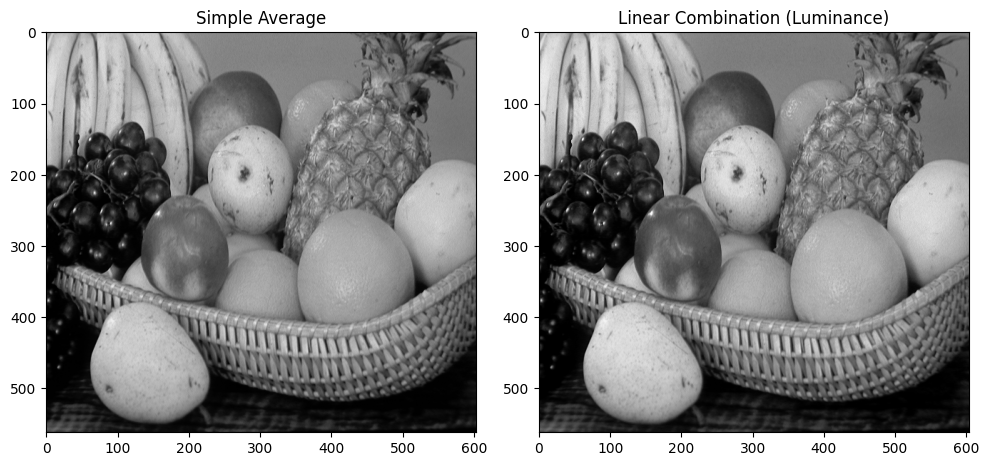

In [16]:
# Simple average of RGB channels
img_mean = np.mean(imrgb, axis=2)

# Weighted linear combination for luminance (Y)
# Y = 0.2125 R + 0.7154 G + 0.0721 B
img_lin = 0.2125 * imrgb[:, :, 0] + 0.7154 * imrgb[:, :, 1] + 0.0721 * imrgb[:, :, 2]

fig,ax = plt.subplots(1,2,figsize=(10, 10))
ax[0].imshow(img_mean,cmap='gray')
ax[0].set_title('Simple Average')
ax[1].imshow(img_lin,cmap='gray')
ax[1].set_title('Linear Combination (Luminance)')
fig.tight_layout()
plt.show()

### Opponent spaces
Color opponent spaces are characterized by a channel representing an
achromatic signal, as well as two channels encoding color
opponency. The two chromatic channels generally represent an
approximate red-green opponency and yellow- blue opponency.
$$ O_1 = \frac 1 {\sqrt{2}} (R-G),\;  O_2 =  \frac 1 {\sqrt{6}}
(R+G-2B),\; O_3 = \frac 1 {\sqrt{3}} (R+G+B)$$

Display the $O_1$, $O_2$ and $O_3$ coordinates for different color images.

In [ ]:
...

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes[0].imshow(O1, cmap='gray')
axes[0].set_title('O1')
axes[1].imshow(O2, cmap='gray')
axes[1].set_title('O2')
axes[2].imshow(O3, cmap='gray')
axes[2].set_title('O3')
fig.tight_layout()

### HSV / HSL / HSI spaces (Hue, Saturation, Value / Luminance /Intensity)

These color spaces are obtained by a non-linear transformation of the
RGB coordinates into polar coordinates. The luminance (or value V)
corresponds to the vertical axis of the cylinder; the hue corresponds to the
angular coordinate and the saturation to the distance from the axis.
See https://en.wikipedia.org/wiki/HSL_and_HSV for more details.

The conversion from RGB to HSV can be done with the function `color.rgb2hsv` from skimage.

In [ ]:
...

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

axes[0].imshow(imhsv[:,:,0], cmap='hsv')
axes[0].set_title('H')
axes[1].imshow(imhsv[:,:,1], cmap='gray')
axes[1].set_title('S')
axes[2].imshow(imhsv[:,:,2], cmap='gray')
axes[2].set_title('V')
fig.tight_layout()

(Bonus Question, at home):
Reconstruct and display the RGB image after the following transformations :
- saturation reduction (apply an offset to the saturation channel)
- rotation of the hue channel
- Gamma transformation on the luminance
($ x\mapsto x^\gamma $ with $\gamma <1$)

In [ ]:
def saturation_reduction(imhsv,alpha):
  # alpha must be larger than one
  res = imhsv.copy()
  ...
  return(res)

def hue_rotation(imhsv,angle):
  # angle must be in the [0,1] range
  res = imhsv.copy()
  ...
  return(res)

def gamma_transformation(imhsv,gamma):
  # gamma must be in the ]0,1[ range
  res = imhsv.copy()
  ...
  return(res)

# try out different parameters
img_saturation = skimage.color.hsv2rgb(saturation_reduction(imhsv,2))
img_hue_r = skimage.color.hsv2rgb(hue_rotation(imhsv,0.1))
img_gamma = skimage.color.hsv2rgb(gamma_transformation(imhsv,1/2.2))

#visualization
fig,axs = plt.subplots(1,3,figsize = (15,5))
axs[0].imshow(img_saturation)
axs[1].imshow(img_hue_r)
axs[2].imshow(img_gamma)
plt.show()

## Segmentation of a graylevel image by Thresholding

Classifying pixel in classes is known as segmentation, and is very important in many applications such as medical imaging analysis or self-driving cars. For example, know what a cell pixel or a background pixel looks like. For self-driving cars it is important to know what is a pedestrian and what is not a pedestrian.

In this section we will separate pixels of a graylevel image in three classes using simple thresholding.

You will define a segmentation `imgseg` that is an image with same size as `img` such that:
- `imgseg` takes value $0$ where `img` takes values in $[0,t_1[$
- `imgseg` takes value $0.5$ where `img` takes values in $[t_1,t_2[$
- `imgseg` takes value $1$ where `img` takes values in $[t2,1]$

In [ ]:
img=skio.imread('imagesTP3/cell.tif')
img = np.array(img, dtype=np.float64) / 255

...

fig = plt.figure(figsize=(15, 7))
axis = fig.add_subplot(1, 2, 1)
axis.imshow(img,cmap='gray')
axis.set_title('Original image')
axis.axis('off')
axis = fig.add_subplot(1, 2, 2)
axis.imshow(imgseg,cmap='gray')
axis.set_title('Segmented Image')
axis.axis('off')
plt.show()

## (BONUS) Segmentation of a color image with K-means algorithm

In this section we will use classification algorithms to quantize an image in a limited number of colors.
We will now display the color distribution of an RGB image as a 3D point cloud. If the image is large, the point cloud will be too dense for vizualization. A solution is to subsample randomly this point cloud for vizualization.

In [ ]:
imrgb =skio.imread("imagesTP3/fruits.tif")
fig = plt.figure(figsize=(15, 7))
axis = fig.add_subplot(1, 2, 1)
axis.imshow(imrgb)
[nrow,ncol,nch]=imrgb.shape
X = imrgb.reshape((nrow*ncol,3))
nb = 3000
idx = np.random.randint(X.shape[0], size=(nb,))
Xs = X[idx, :]/255.
print(Xs.shape)

axis = fig.add_subplot(1, 2, 2, projection="3d")

axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(Xs[:, 0], Xs[:,1],Xs[:, 2],c=Xs, s=40)
plt.show()

In order to limit the size of an image for memory problems, one solution is to quantize the image, that is to limit the number of possible colors to a very limited number. In the following cell you will code a quantization algorithm based on Kmeans. Kmeans is an unsupervised learning algorithm, that clusters pointclouds together, based on their position in the color space.
The algorithm is the following :
- reshape the image into an array of shape (h*w,3)
- train the Kmeans model of `scikit-learn` on a subset of the pixels
- predict the labels of those pixels with `kmeans.predict` function
- get the colors of the clusters using `kmeans.cluster_centers_`

Once everything is done you can run the code and visualize the results.


In [ ]:
k = 30 # number of classes
def color_quantization_with_kmeans(imrgb,k):

    ...

    return(labels,colors)

# Extract the labels and the values of the colors of each cluster
labels,colors = color_quantization_with_kmeans(imrgb,30)
print(labels.shape)
print(colors.shape)


# don't modify this code
def visualize_quantization(shape,labels,colors):
  new_image = np.zeros(shape)
  label_matrix = labels.reshape(shape[0],shape[1])
  for i in range(shape[0]):
    for j in range(shape[1]):
      new_image[i,j,:] = colors[label_matrix[i,j]]

  # visualization
  fig = plt.figure(figsize=(15, 7))
  axis = fig.add_subplot(1, 2, 1)
  axis.imshow(np.uint8(new_image))
  [nrow,ncol,nch]=imrgb.shape
  X = new_image.reshape((nrow*ncol,3))
  nb = 3000
  idx = np.random.randint(X.shape[0], size=(nb,))
  Xs = X[idx, :]/255.

  axis = fig.add_subplot(1, 2, 2, projection="3d")

  axis.set_xlabel("Red")
  axis.set_ylabel("Green")
  axis.set_zlabel("Blue")
  axis.scatter(Xs[:, 0], Xs[:,1],Xs[:, 2],c=Xs, s=40)
  plt.show()

# visualize the quantized image
visualize_quantization(imrgb.shape,labels,colors)
